# Sentiment Classification Model Using BERT

## Project Overview
This project implements a sentiment analysis system that classifies product reviews into three sentiment categories using BERT from Hugging Face's Transformers library.

![Sentiment Analysis](https://example.com/sentiment-analysis.png) *Add your diagram path here*

## Workflow Stages

### 1. Data Preparation
- **Data Collection**: Combined multiple review datasets
- **Column Selection**: Rating scores and review text
- **Data Cleaning**:
  - Removed incomplete entries
  - Filtered empty reviews
  - Standardized text formatting

### 2. Label Conversion
Mapped 5-star ratings to sentiment classes:

| Rating | Sentiment Class |
|--------|-----------------|
| 1-2    | Negative        |
| 3      | Neutral         |
| 4-5    | Positive        |

### 3. Dataset Balancing
- Created balanced dataset:
  - 2,000 samples per class
  - Equal representation
- Addressed class imbalance

### 4. Data Splitting
- **Training Set**: 80% of data
- **Validation Set**: 20% of data
- **Stratified Sampling**: Maintained class proportions

### 5. Text Processing
- Tokenization of review texts
- Length handling:
  - Truncation for long reviews
  - Padding for short reviews
- Max sequence length: 512 tokens

### 6. Model Setup
- Loaded pre-trained BERT-base
- Adapted for classification:
  - Three output classes
  - Fine-tuning ready

### 7. Training Configuration
| Parameter        | Value  |
|------------------|--------|
| Epochs           | 3      |
| Batch Size       | 16     |
| Learning Rate    | 2e-5   |
| Evaluation       | Epoch  |

### 8. Model Training
- Automated training loop
- Performance tracking:
  - Training metrics
  - Validation metrics
- Progress logging

### 9. Performance Evaluation
**Evaluation Metrics**:
- Accuracy
- Precision
- Recall  
- F1 Score

**Visualization**:
- Confusion matrix
- Classification report

### 10. Model Deployment
- Saved complete model
- Included tokenizer
- Created compressed package
- Ready for production

## Key Advantages
✅ **State-of-the-art** BERT architecture  
✅ **Robust** to real-world data  
✅ **Fair** class representation  
✅ **Comprehensive** evaluation  
✅ **Production-ready** deployment  

## Conclusion
This implementation provides a complete pipeline for production-quality sentiment analysis using cutting-edge NLP techniques.


In [1]:
!pip install -q transformers datasets scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12=

##  Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments

## Loading Datasets

In [3]:
file1 = "/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"  # Main Amazon product reviews dataset
file2 = "/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"  # Supplemental Amazon reviews
file3 = "/1429_1.csv"  # Third-party product reviews dataset

##  Reading Review Data

In [6]:
# Load Amazon review datasets with rating and text columns
df1 = pd.read_csv(file1, usecols=["reviews.rating", "reviews.text"])
df2 = pd.read_csv(file2, usecols=["reviews.rating", "reviews.text"])

## Reading and Renaming Columns in the Third Dataset

In [8]:
columns = ["product_id", "name", "asins", "brand", "categories", "keys", "manufacturer", "date", "dateAdded",
           "dateSeen", "didPurchase", "doRecommend", "review_id", "numHelpful", "rating",
           "sourceURLs", "text", "title", "userCity", "userProvince", "username"]
# Load third-party reviews dataset with standardized rating/text column names
df3 = pd.read_csv(file3, names=columns, header=None)
df3 = df3[["rating", "text"]]
df3.columns = ["reviews.rating", "reviews.text"]

<ipython-input-8-02f38938e42f>:4: DtypeWarning: Columns (1,10,12,13,14,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file3, names=columns, header=None)


## Merging All Review Data


In [9]:
# Combine all review datasets into a single DataFrame with continuous indexing
df = pd.concat([df1, df2, df3], ignore_index=True)

## Cleaning the Review Data

In [10]:
# Remove rows with missing ratings or review text
df = df.dropna(subset=["reviews.rating", "reviews.text"]) 

# Convert ratings to numeric type, coercing invalid values to NaN
df["reviews.rating"] = pd.to_numeric(df["reviews.rating"], errors="coerce")

# Clean review text by converting to string and stripping whitespace
df["reviews.text"] = df["reviews.text"].astype(str).str.strip()

# Remove rows with empty review text after cleaning
df = df[df["reviews.text"] != ""]

<ipython-input-10-55a4dcb21c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews.rating"] = pd.to_numeric(df["reviews.rating"], errors="coerce")
<ipython-input-10-55a4dcb21c39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews.text"] = df["reviews.text"].astype(str).str.strip()


## Mapping Star Ratings to Sentiment Labels

In [11]:
# Convert star ratings to sentiment labels (0=Negative, 1=Neutral, 2=Positive)
def map_star_to_label(star):
    if star in [1, 2]:
        return 0  # Negative
    elif star == 3:
        return 1  # Neutral
    elif star in [4, 5]:
        return 2  # Positive

# Apply mapping to create new label column
df["label"] = df["reviews.rating"].apply(map_star_to_label)

## Sampling for Balanced Dataset

In [12]:
# Create balanced dataset with 2000 samples per sentiment class (random sampling for positive)
pos_df = df[df["label"] == 2].sample(n=2000, random_state=42)  # Positive reviews
neg_df = df[df["label"] == 0]  # Negative reviews (all available)
neu_df = df[df["label"] == 1]  # Neutral reviews (all available)

## Creating a Balanced Dataset

In [13]:
# Combine sampled sentiment classes into balanced dataset and verify class distribution
balanced_df = pd.concat([pos_df, neg_df, neu_df], ignore_index=True)
print(balanced_df["label"].value_counts())


label
1.0    2902
0.0    2510
2.0    2000
Name: count, dtype: int64


## Splitting the Dataset into Train and Validation Sets

In [14]:
# Split data into train/validation sets (80/20) with stratified sampling
train_texts, val_texts, train_labels, val_labels = train_test_split(
    balanced_df["reviews.text"], balanced_df["label"], test_size=0.2, random_state=42, stratify=balanced_df["label"]
)

## Tokenizing the Texts for BERT

In [15]:
# Initialize BERT tokenizer with uncased vocabulary
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def tokenize_texts(texts, labels):

        # Tokenize texts with padding/truncation to max BERT length
    tokens = tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        # Convert labels to integers and add to tokenized output
    tokens["labels"] = list(map(int, labels)) 

        # Create HuggingFace Dataset from tokenized inputs
    return Dataset.from_dict(tokens)

# Create training and validation datasets
train_dataset = tokenize_texts(train_texts, train_labels)
val_dataset = tokenize_texts(val_texts, val_labels)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Loading the BERT Model for Sequence Classification

In [16]:
# Initialize BERT model for 3-class sentiment classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Setting Up Training Arguments

In [17]:
# Configure training parameters for BERT fine-tuning
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


## Defining Evaluation Metrics

In [18]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}


## Training the Model

In [19]:
# Initialize the Trainer for BERT fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Execute the training process
trainer.train()

<ipython-input-19-23c3d7f9861e>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alhanoofffj (alhanoofffj-ironhack) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.731200,0.551641,0.784895,0.784465,0.784895,0.783900
2,0.505900,0.571336,0.811194,0.813872,0.811194,0.811831
3,0.259600,0.760001,0.813891,0.816735,0.813891,0.814643


TrainOutput(global_step=2226, training_loss=0.45801312325778354, metrics={'train_runtime': 912.187, 'train_samples_per_second': 19.499, 'train_steps_per_second': 2.44, 'total_flos': 4679998361127936.0, 'train_loss': 0.45801312325778354, 'epoch': 3.0})

## Evaluating the Model on the Validation Set

In [20]:
# Generate predictions on validation set
preds_output = trainer.predict(val_dataset)

# Extract true labels and convert model predictions to class labels
y_true = preds_output.label_ids
y_pred = np.argmax(preds_output.predictions, axis=1)

## Importing Libraries for Evaluation and Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

## Model Evaluation: Accuracy, Precision, Recall, and F1-Score

In [22]:
# Calculate and display overall classification accuracy
accuracy = accuracy_score(y_true,y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate class-wise metrics (precision, recall, F1) for each sentiment
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=[0, 1, 2])

# Define class names for display
classes = ["Negative", "Neutral", "Positive"]

# Print detailed metrics for each sentiment class
print("\nDetailed Evaluation Metrics:")
for i, cls in enumerate(classes):
    print(f"{cls}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}")

Accuracy: 0.8139

Detailed Evaluation Metrics:
Negative:
  Precision: 0.8785
  Recall:    0.8207
  F1-score:  0.8486
Neutral:
  Precision: 0.7613
  Recall:    0.8124
  F1-score:  0.7860
Positive:
  Precision: 0.8198
  Recall:    0.8075
  F1-score:  0.8136


## Visualizing the Confusion Matrix

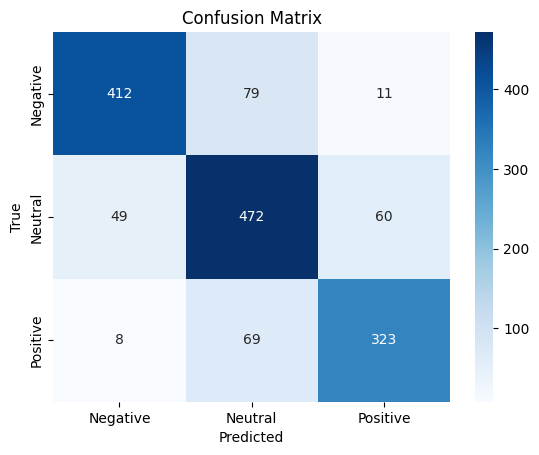

In [23]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])

# Add axis labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Generating the Classification Report

In [24]:
# Generate and print comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.82      0.85       502
     Neutral       0.76      0.81      0.79       581
    Positive       0.82      0.81      0.81       400

    accuracy                           0.81      1483
   macro avg       0.82      0.81      0.82      1483
weighted avg       0.82      0.81      0.81      1483



## Saving the Trained Model

In [ ]:
# Save the trained model and tokenizer for future use
model.save_pretrained("saved_model_dir")
tokenizer.save_pretrained("saved_model_dir")
model.save_pretrained("saved_model_dir")

# Create zip archive of the model directory (for Colab download)
!zip -r saved_model.zip saved_model_dir

# Download the zipped model from Google Colab
from google.colab import files
files.download("saved_model.zip")